In [313]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [314]:
data = pd.read_csv('bank-marketing.csv')
data_copy = data.copy()

In [315]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [316]:
Itemlist = []
for col in data.columns:
    Itemlist.append([col, data[col].dtype, data[col].isnull().sum(),
                     round(data[col].isnull().sum()/len(data[col])*100,2), 
                     data[col].nunique(), 
                     list(data[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=Itemlist)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,77,"[37, 47, 40, 45, 44]"
1,job,object,0,0.0,12,"[services, technician, admin.]"
2,salary,int64,0,0.0,11,"[100000, 20000]"
3,marital,object,0,0.0,3,"[married, single]"
4,education,object,0,0.0,4,"[unknown, secondary, tertiary]"
5,targeted,object,0,0.0,2,"[no, yes]"
6,default,object,0,0.0,2,[no]
7,balance,int64,0,0.0,7168,"[1269, 2523, 2311, 2378, 2299]"
8,housing,object,0,0.0,2,"[yes, no]"
9,loan,object,0,0.0,2,"[no, yes]"


In [317]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### We notice that pdays is having [25, 50, 75] percentiles as -1 which indicates that missing values are denoted by -1.

In [318]:
data[data.duplicated()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


### Which age was targeted most and which one of them responded positively?

Text(0.5, 1.0, 'Relationship between age and response')

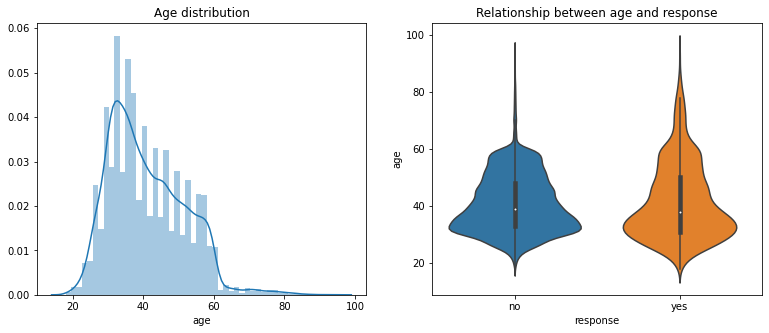

In [319]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
sns.distplot(data['age']).set_title('Age distribution')

plt.subplot(1, 2, 2)
sns.violinplot(x = 'response', y = 'age', data=data).set_title('Relationship between age and response')

* We see from the above graph that most people targeted in the campaign lie in the age group of 25 to 50.
* It is clear that people lying in the age group of 25 to 40 respond positively than any other age group.

### Does job description affect the chances of success?

Text(0.5, 1.0, 'Response by job description')

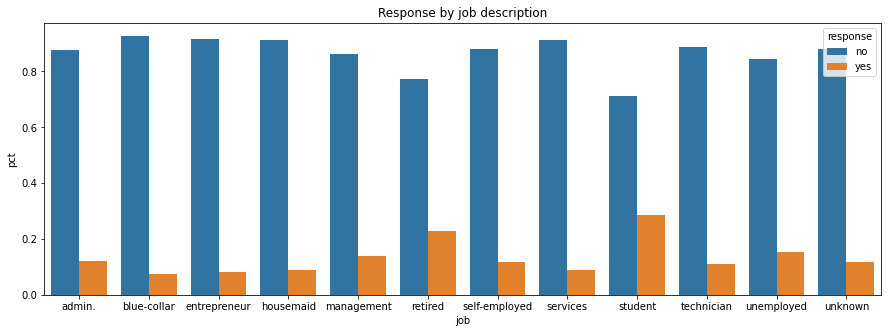

In [320]:
grouped_job = pd.DataFrame(data.groupby(['job'])['response'].value_counts(normalize=True))
grouped_job.rename(columns={"response" : "pct"}, inplace=True)
grouped_job.reset_index(inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='job', y='pct', hue='response', data=grouped_job).set_title('Response by job description')

* From the above plot it can be said that customers responding positively to the camapign are very less.
* Customer with job role as management seems to interested more than any other job role.

### Does people with high profile job and high salary have greater chances of positive response?

In [321]:
job_salary = pd.DataFrame(data.groupby('job')['salary'].unique().apply(lambda x : x[0])).reset_index()
job_response = pd.crosstab(data['job'], data['response']).reset_index()
data1 = pd.merge(job_salary, job_response)

In [322]:
data1.sort_values('yes', ascending=False)

,job,salary,no,yes
4,management,100000,8157,1301
9,technician,60000,6757,840
1,blue-collar,20000,9024,708
0,admin.,50000,4540,631
5,retired,55000,1748,516
7,services,70000,3785,369
8,student,4000,669,269
10,unemployed,8000,1101,202
6,self-employed,60000,1392,187
2,entrepreneur,120000,1364,123


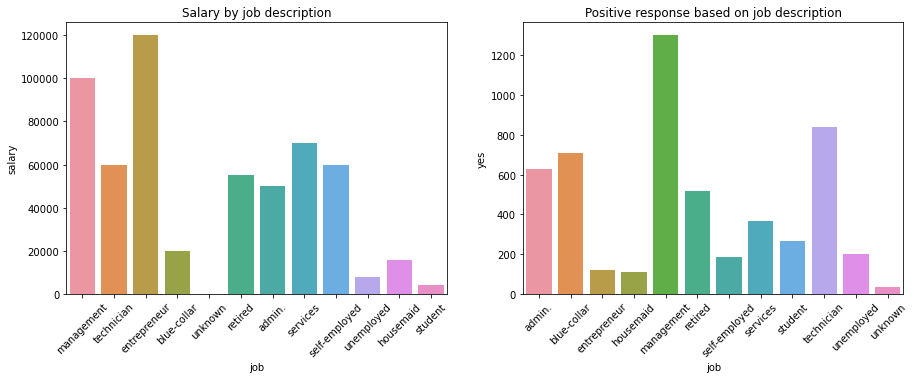

In [323]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
g = sns.barplot(x='job', y='salary', data=data)
g.set_title('Salary by job description')
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.subplot(1, 2, 2)
g1 = sns.barplot(x='job', y='yes', data=data1)
g1.set_title('Positive response based on job description')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.show()

Yes, it is clearly visible that people with high job profile and salary tend to be more interested.

### Does marital status decide the response type?

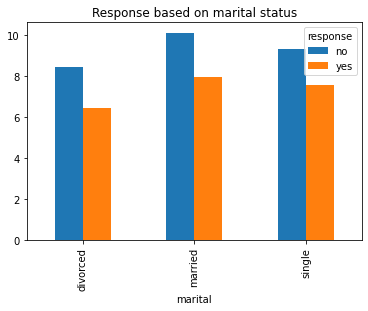

In [324]:
np.log(pd.crosstab(data['marital'], data['response'])).plot.bar(title = 'Response based on marital status')

Positive response is almost neutral in case of marital status.

### Does married people of younger age responds positively to the campaign?

In [325]:
data2 = data[(data['marital']=='married') & (data['age']<25)]

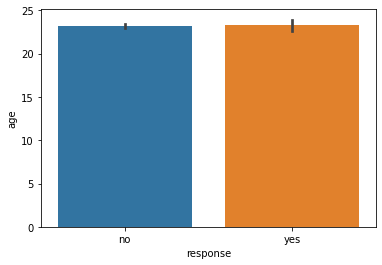

In [326]:
sns.barplot(x='response', y='age', data=data2)

Ratio of yes/no among married young customer seems to be equal.

### Age distribution based on marital status

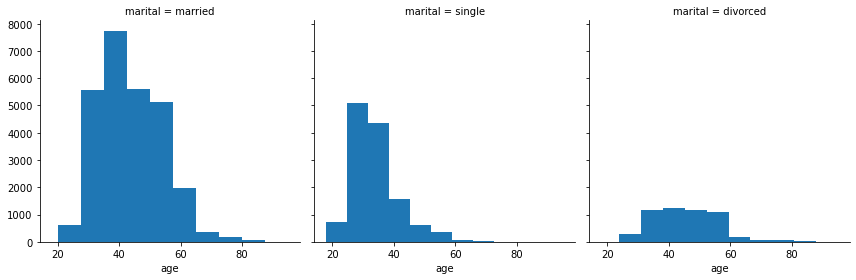

In [327]:
m = sns.FacetGrid(data, col='marital', height = 4)
m.map(plt.hist, 'age')

* From the 1st plot it can be seen that mostly married people lie around 25 to 56.
* Single people lie in the age group of 25 to 37.
* Most probably divorced people lie in the age group of 30 to 60.

### What is the relationship between education level and salary?

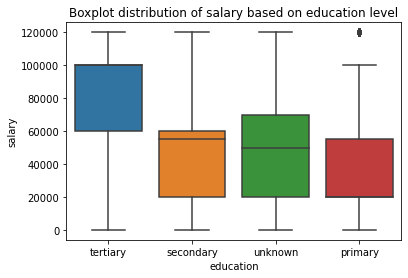

In [328]:
sns.boxplot(x='education', y='salary', data=data).set_title('Boxplot distribution of salary based on education level')
plt.show()

It is clear from the above graph that people with high level of education tend to have high salary.

### Are customer of low job profile and married are most responsive one?

Text(0.5, 1.0, 'Response of married and low job profile customers')

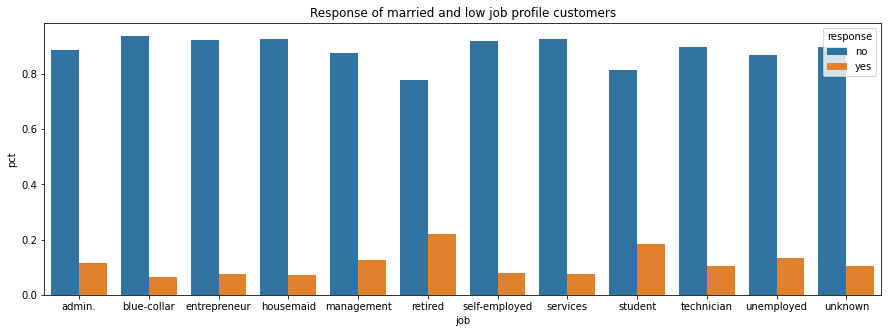

In [329]:
grouped_job_married = pd.DataFrame(data[data['marital']=='married'].groupby(['job'])['response'].value_counts(normalize=True))
grouped_job_married.rename(columns={"response" : "pct"}, inplace=True)
grouped_job_married.reset_index(inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='job', y='pct', hue='response', data=grouped_job_married).set_title('Response of married and low job profile customers')

Yes, people who are married and have low job profile tend to response more positvely than any other job profile.

### Are the targeted customers interested in such campaigns?

In [330]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In order to answer this questions checking of previous campaign records would be appropriate.

Text(0.5, 1.0, 'Results of previous campaign')

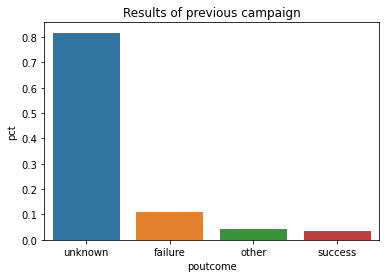

In [331]:
grouped_poutcome = pd.DataFrame(data['poutcome'].value_counts(normalize=True))
grouped_poutcome = grouped_poutcome.reset_index().rename(columns={"index" : "poutcome", "poutcome" : "pct"})
sns.barplot(x='poutcome', y='pct', data=grouped_poutcome).set_title('Results of previous campaign')

Text(0.5, 1.0, 'Boxplot of Days passed after last contact')

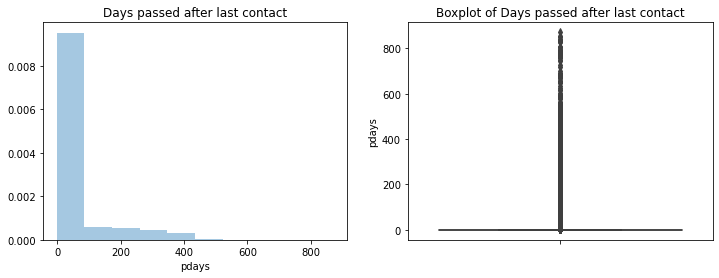

In [332]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(data['pdays'], bins=10).set_title('Days passed after last contact')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['pdays']).set_title('Boxplot of Days passed after last contact')

Text(0.5, 1.0, 'Boxplot of Contacts performed before this campaign')

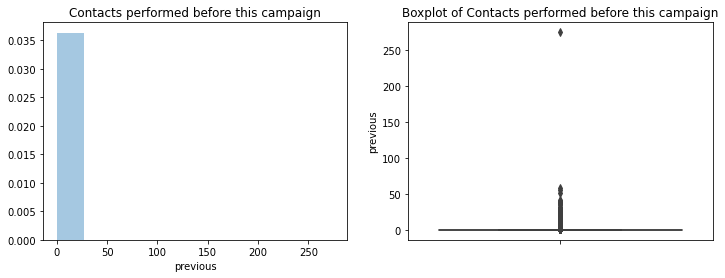

In [333]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(data['previous'], bins=10).set_title('Contacts performed before this campaign')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['previous']).set_title('Boxplot of Contacts performed before this campaign')

It seems that mostly people were contacted within few days still people dosen't seems to be interested in such campaigns.

### Does targeted customer with high job profile and high salary interested in such campaigns anymore?

In [334]:
data.groupby('job')['salary'].unique().apply(lambda x : x[0]).sort_values(ascending=False)

job
entrepreneur     120000
management       100000
services          70000
technician        60000
self-employed     60000
retired           55000
admin.            50000
blue-collar       20000
housemaid         16000
unemployed         8000
student            4000
unknown               0
Name: salary, dtype: int64

In [335]:
data3 = data[(data['salary']>50000) & (data['targeted']=='yes')]['response'].value_counts(normalize=True)
data3 = pd.DataFrame(data3)
data3 = data3.reset_index().rename(columns={'index' : 'response', 'response' : 'pct'})

Text(0.5, 1.0, 'Response of high job profile customer on previous campaigns')

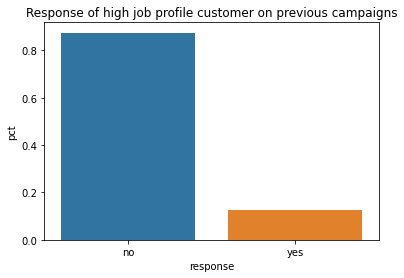

In [336]:
grouped_high_job = pd.DataFrame(data[data['salary']>50000]['response'].value_counts(normalize=True)).reset_index().rename(columns={'index' : 'response', 'response' : 'pct'})
sns.barplot(x='response', y = 'pct', data=grouped_high_job).set_title('Response of high job profile customer on previous campaigns')

Text(0.5, 1.0, 'Response of targeted customer with high job profile')

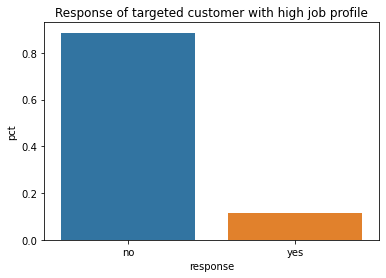

In [337]:
sns.barplot(x='response', y = 'pct', data=data3).set_title('Response of targeted customer with high job profile')

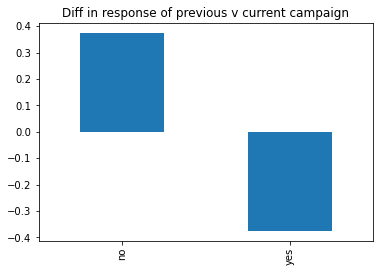

In [338]:
(data[data['salary']>50000]['response'].value_counts(normalize=True) - data3['response'].value_counts(normalize=True)).plot.bar(title='Diff in response of previous v current campaign')

There is not much significant difference in the response of high job profile customers from previous to current campaign.

### Distribution of diff in salary and balance.

In [339]:
data['expenditure'] = data['salary'] - data['balance']

Text(0.5, 1.0, 'Distribution of expenditure')

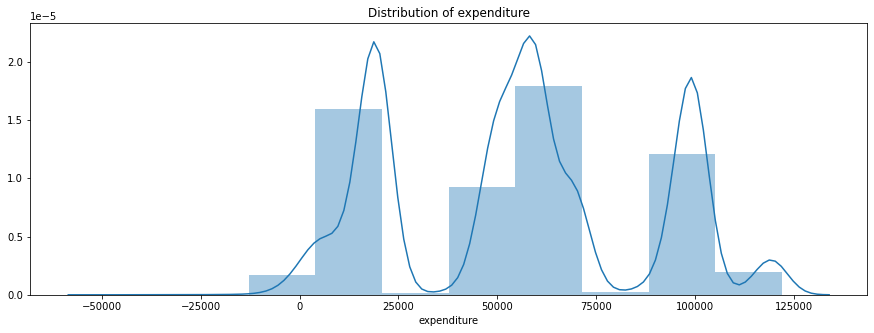

In [340]:
plt.figure(figsize=(15,5))
sns.distplot(data['expenditure'], bins=10).set_title('Distribution of expenditure')

It seems there are people with varying limit in terms of expenditure.

### What is the response of customer with high expenditure?

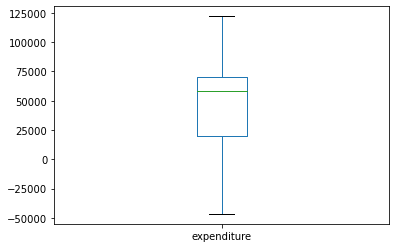

In [341]:
data['expenditure'].plot.box()

In [342]:
threshold = data['expenditure'].quantile(0.90)

In [343]:
less_exp = pd.DataFrame(data[data['expenditure']<threshold]['response'].value_counts(normalize=True))
less_exp = less_exp.reset_index().rename(columns={'index' : 'response', 'response' : 'pct'})

high_exp = pd.DataFrame(data[data['expenditure']>=threshold]['response'].value_counts(normalize=True))
high_exp = high_exp.reset_index().rename(columns={'index' : 'response', 'response' : 'pct'})

Text(0.5, 1.0, 'Response by expenditure with greater or equal to cutoff')

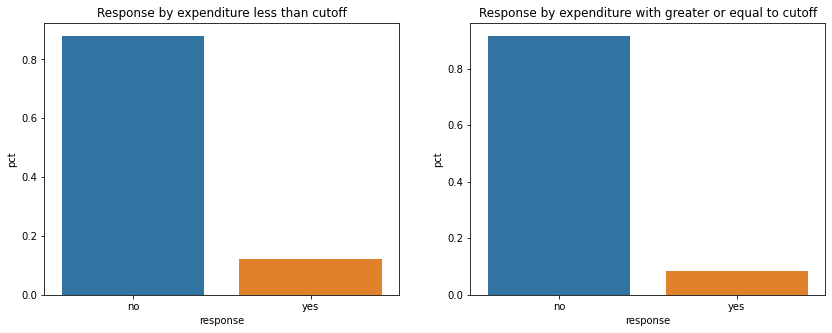

In [344]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.barplot(x='response', y='pct', data = less_exp).set_title('Response by expenditure less than cutoff')

plt.subplot(1, 2, 2)
sns.barplot(x='response', y='pct', data = high_exp).set_title('Response by expenditure with greater or equal to cutoff')

Although, the response from customers are very few. But, those who spend less have greater chances of postive response as compared to those who spend more.

### Is there any relationship between education level and bank balance?

Text(0.5, 1.0, 'Boxplot distribution of balance by education level')

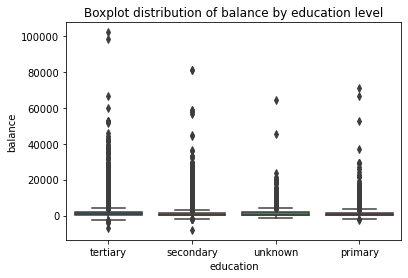

In [345]:
sns.boxplot(x='education', y='balance', data=data).set_title('Boxplot distribution of balance by education level')

There is not much difference in the statistical measure of balance by education. Rather, it depends on person-to-person.

### What are the chances of customer responding positively who already have home and personal loan?

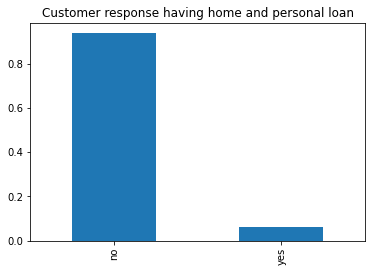

In [346]:
data[(data['housing']=='yes') & (data['loan']=='yes')]['response'].value_counts(normalize=True).plot.bar(title='Customer response having home and personal loan')

Not much people are interested in such campaigns who already have loans.

### What are the ways of contacting a customer. And which contact types are most effective?

In [347]:
grouped_contact = pd.DataFrame(data['contact'].value_counts(normalize=True)).reset_index().rename(columns={'index' : 'contact_type', 'contact' : 'pct'})

Text(0.5, 1.0, 'Different contact types for contacting customers')

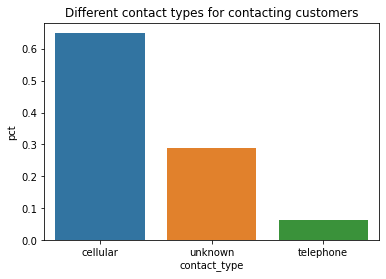

In [348]:
sns.barplot(x='contact_type', y ='pct', data=grouped_contact).set_title('Different contact types for contacting customers')

In [349]:
grouped_contact_response = pd.DataFrame(data.groupby(['contact'])['response'].value_counts(normalize=True)).rename(columns={"response" : "pct"}).reset_index()

Text(0.5, 1.0, 'Response by contact type')

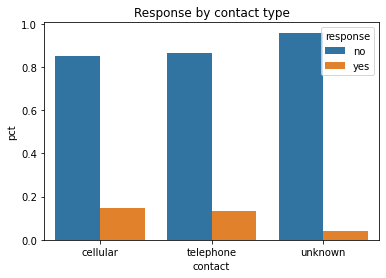

In [350]:
sns.barplot(x='contact', y='pct' , data=grouped_contact_response, hue='response').set_title('Response by contact type')

Most of the people use cell phones as a communication device and it would be better if we target customer who use cell phones.

### In which month and day most customer were addressed?

In [351]:
grouped_month = pd.DataFrame(data['month'].value_counts(normalize=True)).reset_index().rename(columns={"index" : "month", "month" : "pct"})
grouped_day = pd.DataFrame(data['day'].value_counts(normalize=True)).reset_index().rename(columns={"index" : "day", "day" : "pct"})

Text(0.5, 1.0, 'Customer addressed by day')

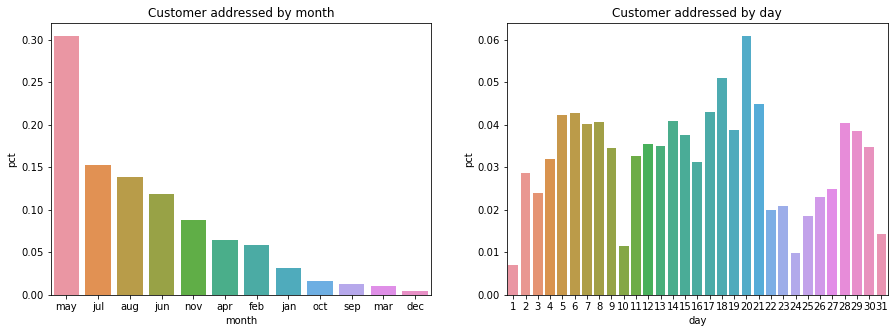

In [352]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='month', y='pct', data=grouped_month).set_title('Customer addressed by month')

plt.subplot(1, 2, 2)
sns.barplot(x='day', y='pct', data=grouped_day).set_title('Customer addressed by day')

It seems in the month of may most customers are handled and this may be due to the fact that vacations are going on at that point of time.

### What is the effect of regular campaigning to a customer?

In [353]:
grouped_camp = pd.DataFrame(data['campaign'].value_counts(normalize=True)).reset_index().rename(columns={"index" : "campaign_freq", "campaign" : "pct"})

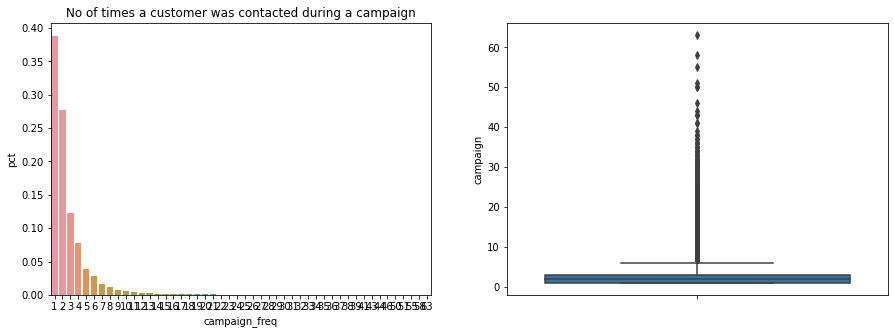

In [354]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x='campaign_freq', y='pct', data=grouped_camp).set_title('No of times a customer was contacted during a campaign')

plt.subplot(1, 2, 2)
sns.boxplot(y = data['campaign'])

In [355]:
data['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [356]:
bins = [0, 10, 25, 40, 55, 70]
labels = ['0-10', '10-25', '25-40', '40-55', '55-70']
data['campaign_size'] = pd.cut(data['campaign'], bins =bins, labels = labels)

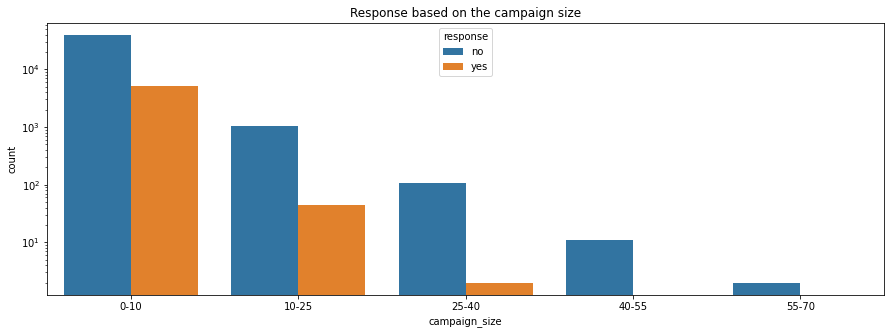

In [357]:
plt.figure(figsize=(15,5))
sns.countplot(data['campaign_size'], hue=data['response']).set_title('Response based on the campaign size')
plt.yscale('log')

* It is clear from above graph that as people are being contacted more and more for a particular contact they seems to lose interest.
* The campaign team also needs to keep track of these records as it will save their time and focus on things which will add value to them.

### Modelling

In [358]:
def get_dummies(x,df):
    temp = pd.get_dummies(df[x], prefix = x, prefix_sep = '_', drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [359]:
X = data.drop(['response', 'campaign_size'], axis=1)
y = data.response

In [360]:
X.loc[X['pdays']==-1, 'pdays'] = 10000

# Create a new column: recent_pdays 
X['recent_pdays'] = np.where(X['pdays'], 1/X.pdays, 1/X.pdays)

# Drop 'pdays'
X.drop('pdays', axis=1, inplace = True)

In [361]:
cols = X.select_dtypes('object').columns.tolist()

In [362]:
cols = cols + X.select_dtypes('number').columns.tolist()

In [363]:
X[cols].shape

(45211, 19)

In [364]:
categoric_cols = X.select_dtypes('object').columns

In [365]:
numeric_cols = data.select_dtypes('number').columns.tolist()
numeric_cols.remove('pdays')
numeric_cols.append('recent_pdays')

In [366]:
for col in categoric_cols:
    X = get_dummies(col, X)

In [367]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [368]:
y.replace({'yes' : 1, 'no' : 0}, inplace=True)

In [369]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 121)

In [371]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfe = RFE(rf, 15)
rfe = rfe.fit(X_train, y_train)

In [372]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('salary', True, 1),
 ('balance', True, 1),
 ('day', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('previous', True, 1),
 ('expenditure', True, 1),
 ('recent_pdays', True, 1),
 ('job_blue-collar', False, 18),
 ('job_entrepreneur', False, 29),
 ('job_housemaid', False, 28),
 ('job_management', False, 16),
 ('job_retired', False, 21),
 ('job_self-employed', False, 25),
 ('job_services', False, 20),
 ('job_student', False, 26),
 ('job_technician', False, 12),
 ('job_unemployed', False, 27),
 ('job_unknown', False, 31),
 ('marital_married', True, 1),
 ('marital_single', False, 10),
 ('education_secondary', True, 1),
 ('education_tertiary', False, 4),
 ('education_unknown', False, 22),
 ('targeted_yes', False, 13),
 ('default_yes', False, 30),
 ('housing_yes', True, 1),
 ('loan_yes', False, 6),
 ('contact_telephone', False, 17),
 ('contact_unknown', False, 2),
 ('month_aug', False, 8),
 ('month_dec', False, 23),
 ('month_feb', False, 15),
 ('month_jan', Fal

In [373]:
X_train.columns[rfe.support_]

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous',
       'expenditure', 'recent_pdays', 'marital_married', 'education_secondary',
       'housing_yes', 'month_jun', 'month_mar', 'poutcome_success'],
      dtype='object')

In [374]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [375]:
params_grid = {'n_estimators' : [10,20,35,50],
              'criterion' : ['gini', 'entropy'],
               'max_depth' : [10,20,30,50]
              }

### Random Forest Classifier

In [376]:
rfc = RandomForestClassifier()

In [377]:
random_search = RandomizedSearchCV(rfc, param_distributions=params_grid, n_iter=10, cv=10)

In [378]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 50],
                                        'n_estimators': [10, 20, 35, 50]})

In [379]:
random_search.best_estimator_.n_estimators

50

In [380]:
random_search.best_estimator_.criterion

'entropy'

In [381]:
random_search.best_estimator_.max_depth

50

In [382]:
rfc2 = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=20)

In [383]:
rfc2.fit(X_train_rfe, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50)

In [384]:
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [388]:
y_pred = rfc2.predict(X_test_rfe)

In [390]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7987
           1       0.64      0.35      0.45      1056

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

